# Exercise 2

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from   scipy.stats import multivariate_normal

figs=(14,7)

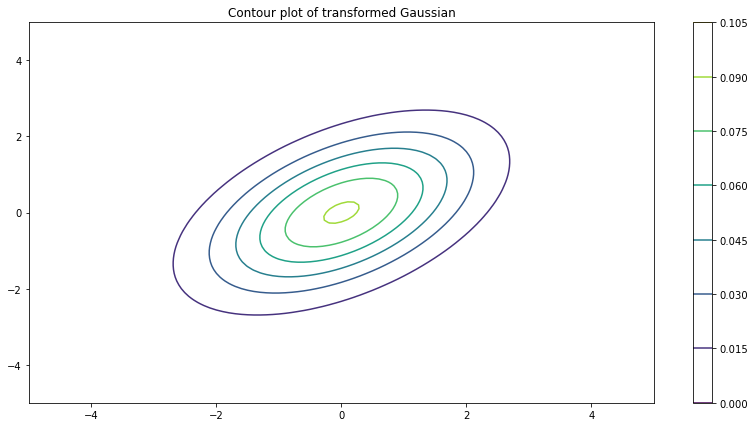

In [9]:
n = 101
x1 = (-5,5)
x2 = (-5,5)
mean = np.array([0, 0])
cov = np.array([[2, 1],[1, 2]])

range_mat = [ [0 for _ in range(n)] for _ in range(n)]
X = [ [0 for _ in range(n)] for _ in range(n)]
Y = [ [0 for _ in range(n)] for _ in range(n)]
for i in range(n):
    for j in range(n):
        val = (x1[0] + j*(x1[1] - x1[0])/(n-1), x2[0] + i*(x2[1] - x2[0])/(n-1))
        range_mat[i][j] = val
        X[i][j] = x1[0] + j*(x1[1] - x1[0])/(n-1)
        Y[i][j] = x2[0] + i*(x2[1] - x2[0])/(n-1)
        

det = np.linalg.det(cov)
F = [ [0 for _ in range(n)] for _ in range(n)]
for i in range(np.shape(F)[0]):
    for j in range(np.shape(F)[1]):
        matrix = np.matmul((range_mat[i][j] - mean).T, np.linalg.inv(cov))
        matrix = np.matmul(matrix,(range_mat[i][j] - mean))
        F[i][j] = 1/np.sqrt(((2*np.pi)**2)*det)*np.exp(-1/2*matrix)

fig, ax1 = plt.subplots(figsize=figs)
plt.contour(X, Y, F)
plt.colorbar()
plt.title("Contour plot of transformed Gaussian")
plt.show()

### Q2 c)

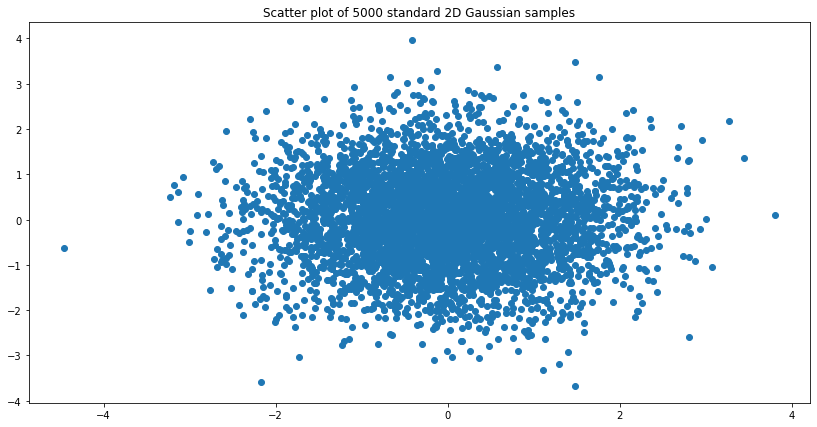

In [10]:
m = np.array([0,0])
c = np.array([[1, 0],[0, 1]])
Z = np.random.multivariate_normal(m, c, 5000)
fig, ax2 = plt.subplots(figsize=figs)
plt.scatter(Z[:,0], Z[:,1])
plt.title("Scatter plot of 5000 standard 2D Gaussian samples")
plt.show()

In [11]:
from scipy.linalg import fractional_matrix_power

cov = np.array([[-2, 1],[1, -2]])
w, v = np.linalg.eig(cov)
lamb = np.diag(w)
A_dash = np.sqrt(lamb)
A = np.matmul(v,A_dash)
A = np.matmul(A, np.linalg.inv(v))

print(A)

[[nan nan]
 [nan nan]]


c:\Users\Parth\miniconda3\envs\TF\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


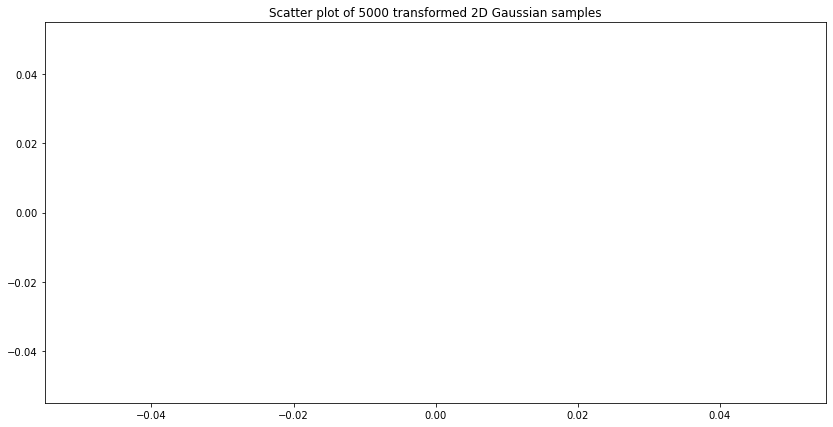

In [12]:
from numpy import matlib
Y = np.dot(A, Z.T) + matlib.repmat(mean,5000,1).T
Y = Y.T
fig, ax3 = plt.subplots(figsize=figs)
plt.scatter(Y[:,0], Y[:,1], color='purple')
plt.title("Scatter plot of 5000 transformed 2D Gaussian samples")
plt.show()

In [19]:
B = np.matmul(cov, cov.T)
np.linalg.inv(B)
B

array([[ 5, -4],
       [-4,  5]])

#### The results from parts (c)(i) and (ii) are in line with the theoritical findings. The plot of (c)(ii) represents a 2D transformed gaussian quite effectively. Similarly, the A matrix calculated from the transformed samples matches with its hand-calculated counterpart